## In the MNIST handwriting classification problem, each image is represented by a 784-dimensional feature vector, where each dimension represents the intensity of a pixel in the image. 

In [24]:
import struct
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [26]:
import warnings
warnings.filterwarnings("ignore")

# Unpack and read the train and test images and labels files

In [27]:
file_name = "train-images-idx3-ubyte.gz"

train_data = None

with gzip.open(file_name, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_data = train_data.reshape((size, nrows, ncols))

print(train_data.shape)
# print(train_data)

(60000, 28, 28)


In [28]:
file_name_1 = "t10k-images-idx3-ubyte.gz"

test_data = None

with gzip.open(file_name_1, 'rb') as f1:
    magic, size = struct.unpack(">II", f1.read(8))
    nrows, ncols = struct.unpack(">II", f1.read(8))
    test_data = np.frombuffer(f1.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_data = test_data.reshape((size, nrows, ncols))

print(test_data.shape)

(10000, 28, 28)


In [29]:
f2 = gzip.open('train-labels-idx1-ubyte.gz','r')
f2.read(8)
Y_train=np.empty(60000).astype(int)
for i in range(0,60000):   
    buf = f2.read(1)
    train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#     print(type(train_labels))
    Y_train[i]=int(train_labels[0])
#     print(train_labels[0],Y_train[i])
    
Y_train

array([5, 0, 4, ..., 5, 6, 8])

In [30]:
f3 = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f3.read(8)
Y_test=np.empty(10000).astype(int)
for i in range(0,10000):   
    buf = f3.read(1)
    test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    Y_test[i]=int(test_labels[0])
#     print(test_labels[0],Y_test[i])
    
Y_test

array([7, 2, 1, ..., 4, 5, 6])

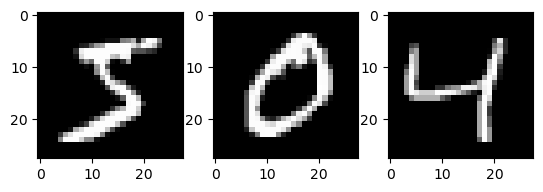

In [31]:
# using subplot function and creating three plots
plt.subplot(1, 3, 1)  # row 1, column 3, count 1
plt.imshow(train_data[0,:,:], cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(train_data[1,:,:], cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(train_data[2,:,:], cmap='gray')
 
# show plot
plt.show()

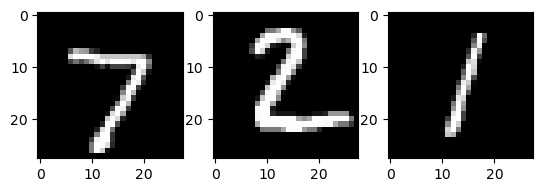

In [32]:
# using subplot function and creating three plots
plt.subplot(1, 3, 1)  # row 1, column 3, count 1
plt.imshow(test_data[0,:,:], cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(test_data[1,:,:], cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(test_data[2,:,:], cmap='gray')
 
# show plot
plt.show()

#### Resample data

In [33]:
nsamples, nx, ny = train_data.shape
X_train = train_data.reshape((nsamples,nx*ny))
print(X_train.shape)
nsamples, nx, ny = test_data.shape
X_test = test_data.reshape((nsamples,nx*ny))

(60000, 784)


## Naive Bayes Model

### Gaussian

#### Gaussian Naive Bayes assumes that the features (pixel in the image) follow a Gaussian distribution, and it is particularly suited for continuous data. It models the probability density function of the features given a class label.

In [34]:
gnb = GaussianNB(var_smoothing=0.08)

gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

In [35]:
print(f'Accuracy on training data: {gnb.score(X_train, Y_train):.2%}')
print(f'Accuracy on test data: {gnb.score(X_test, Y_test):.2%}')

Accuracy on training data: 80.24%
Accuracy on test data: 81.54%


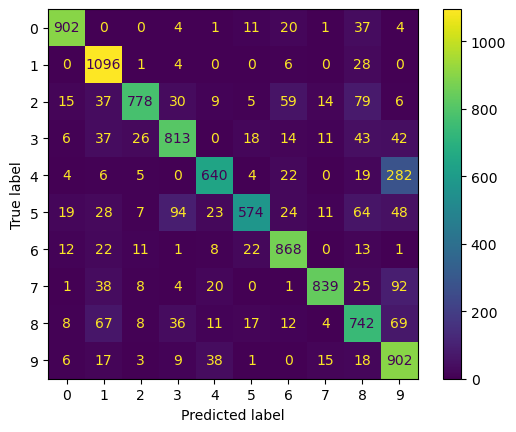

In [36]:
# Let's get a closer look of the types of mistakes by plotting the confusion matrix.
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Multinomial

#### Multinomial Naive Bayes  is well-suited for discrete data such as count-based data, and it models the probability of a feature given a class label as a multinomial distribution. In the MNIST handwriting classification problem, each pixel intensity can be considered as count data, as it represents the number of times a particular pixel was "activated" in the image. 
#### Therefore, Multinomial Naive Bayes is a good choice for this problem.

In [37]:
mnb = MultinomialNB()

mnb.fit(X_train, Y_train)
Y_pred = mnb.predict(X_test)

In [38]:
print(f'Accuracy on training data: {mnb.score(X_train, Y_train):.2%}')
print(f'Accuracy on test data: {mnb.score(X_test, Y_test):.2%}')

Accuracy on training data: 82.53%
Accuracy on test data: 83.65%


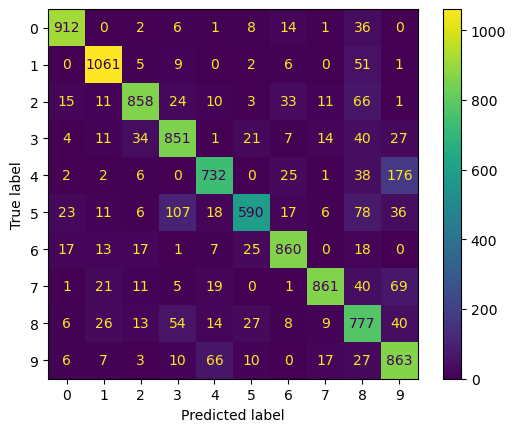

In [39]:
# Let's get a closer look of the types of mistakes by plotting the confusion matrix.
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [40]:
# # Perform 10-fold cross validation
scores = cross_val_score(mnb, X_train, Y_train, cv=8) 
print(f'Average score: {scores.mean():.2%}')

Average score: 82.40%


#### Cross validation for Multinomial cross validation

In [41]:
param_grid = {'alpha': [0.1,0.5,1,2,5]}
mnb = MultinomialNB()
grid_search = GridSearchCV(mnb, param_grid,cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
mnb2 = MultinomialNB(alpha=best_params['alpha'])
mnb2.fit(X_train, Y_train)
print(mnb2.score(X_test, Y_test))

#not much difference with cross validation and hyperparameter tuning since the training data is very high

0.8366


##  Logistic Regression

In [42]:
lrmodel = LogisticRegression(
#         penalty=None,
        penalty="l2", #this prevents overfitting
        class_weight=None,
        random_state=0,
        solver="lbfgs",
        multi_class="multinomial",
        max_iter=500) #max_iter -> gradient steps


lrmodel.fit(X_train, Y_train)
Y_pred = lrmodel.predict(X_test)

In [43]:
print(f'Accuracy on training data: {lrmodel.score(X_train, Y_train):.2%}')
print(f'Accuracy on test data: {lrmodel.score(X_test, Y_test):.2%}')

Accuracy on training data: 94.06%
Accuracy on test data: 92.20%


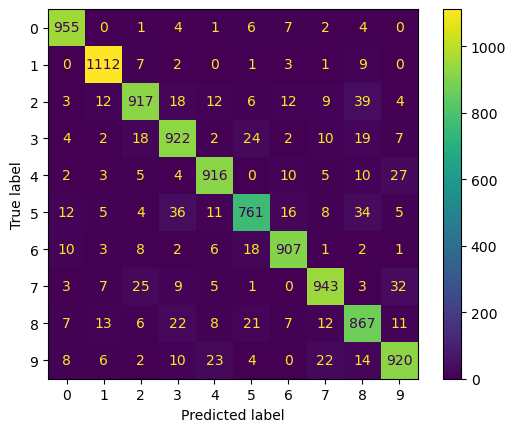

In [44]:
# Let's get a closer look of the types of mistakes by plotting the confusion matrix.
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Writing the models to Pickle file

In [45]:
filename = 'nb.model'
pickle.dump(mnb, open(filename, 'wb'))

In [46]:
filename = 'lr.model'
pickle.dump(lrmodel, open(filename, 'wb'))